# Practical 11 & 12 Implementing & Comparing : LSTM & Bi-LSTM 

# Theory for LSTM:-

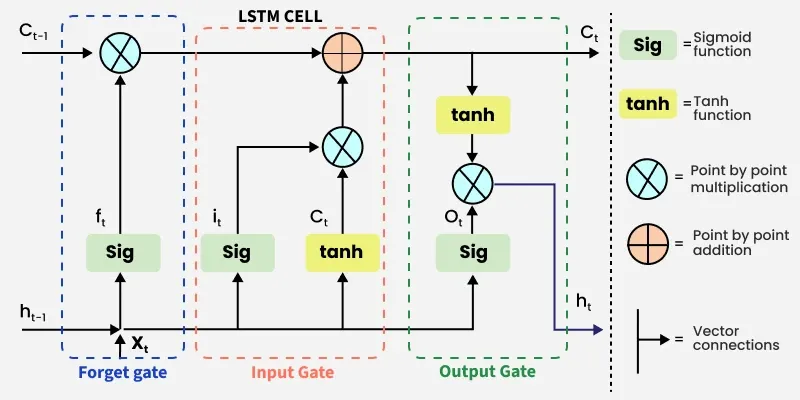

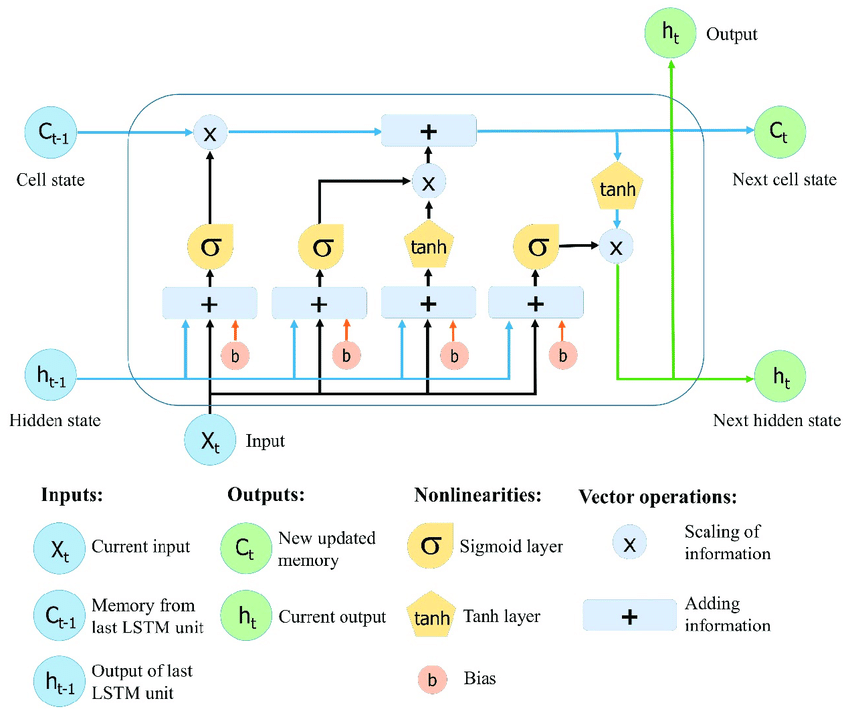

---

# **LSTM – Long Short-Term Memory**

## **1. What is LSTM?**

LSTM (Long Short-Term Memory) is an advanced type of Recurrent Neural Network (RNN) designed to **remember information for long durations**.
It solves the **vanishing gradient problem** found in simple RNNs by using a **memory cell** and **three gates** that control flow of information.

LSTM can learn patterns from **sequential data**, such as:

* text
* speech
* sensor readings
* time-series
* video frames

---

## **2. Why LSTM is Needed?**

Standard RNNs forget older information because gradients shrink as they move backward in time.
This makes them poor at learning long-term dependencies.

LSTM solves this by:

* using a **cell state** that can carry information for long range
* using **gates** to decide what to keep, forget, or output

Thus, LSTM can learn long sequences such as sentences, long tasks, multi-step prediction problems, etc.

---

## **3. LSTM Architecture (Simple Explanation)**

Each LSTM cell has four main components:

### **1. Forget Gate**

* Decides **what part of past memory to erase**.
* Removes unwanted or outdated information.

### **2. Input Gate**

* Decides **what new information should be stored**.

### **3. Candidate Memory**

* Creates a new possible memory value.

### **4. Output Gate**

* Decides **what part of the cell state becomes output** (hidden state).

### **Cell State**

* A long-term memory pathway that flows through the entire sequence.
* Helps LSTM remember information for long periods.

---

# **4. Variants of LSTM**

### **1. Vanilla LSTM**

Standard single-direction LSTM.

### **2. Bi-directional LSTM (BiLSTM)**

Reads sequence from both forward and backward directions.

**Use Cases:**
NLP, speech processing, text tagging.

---

### **3. Stacked / Deep LSTM**

Multiple LSTM layers stacked on each other.

**Use Cases:**
Complex sequence modeling, deep learning tasks.

---

### **4. Peephole LSTM**

Gates also see the previous cell state.

**Use Cases:**
Fine-grained temporal control tasks.

---

### **5. ConvLSTM**

Uses convolution instead of matrix multiplication.

**Use Cases:**
Videos, images, spatiotemporal data.

---

### **6. Attention + LSTM**

LSTM + attention mechanism to improve long-term dependencies.

**Use Cases:**
Translation, speech models, summarization.

---

# **5. Applications / Use Cases of LSTM**

### **Natural Language Processing (NLP)**

* Next word prediction
* Text generation
* Machine translation
* Sentiment analysis
* Chatbots

### **Speech Processing**

* Speech recognition
* Speaker identification
* Emotion detection

### **Time Series Prediction**

* Weather forecasting
* Stock price prediction
* Energy load forecasting
* Medical signals (ECG, EEG)

### **Video and Image Tasks**

* Action recognition
* Video captioning
* Frame prediction (ConvLSTM)

### **Anomaly Detection**

* Network logs
* Sensor faults
* Fraud detection

---

# **6. Advantages of LSTM**

### ✔ Handles long-term dependencies

Can remember information over long sequences better than RNNs.

### ✔ Solves vanishing gradient

Due to cell state and gated mechanism.

### ✔ Works well for sequential and time-dependent data

Text, audio, time-series, etc.

### ✔ Flexible architecture

Can be stacked, bi-directional, attention-based.

### ✔ Good performance on many real-world problems

Before transformers, LSTMs dominated NLP and speech tasks.

---

# **7. Limitations of LSTM**

### ✘ Slow training

More gates = more parameters.

### ✘ High computational cost

Compared to GRU, RNN, and Transformers.

### ✘ Cannot parallelize across time

Each step depends on previous step → slow on long sequences.

### ✘ Sometimes outperformed by Transformers

Transformers handle longer context better.

### ✘ Requires large datasets

To perform well in complex tasks.

---

# **8. Summary**

* LSTM is an RNN architecture designed to store long-range information.
* It uses gates (Forget, Input, Output) and a cell state to control memory flow.
* Works in different formats: 1→1, 1→T, T→1, T→T, seq2seq.
* Highly useful in NLP, speech, time-series, and video tasks.
* Advantages: long memory, stable gradients.
* Limitations: slow, heavy, replaced by transformers in many areas.

---


<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<title>LSTM Simple HTML (No Latex)</title>
</head>
<body>

<h1>LSTM – Sequence Mapping Types, Forward & Backprop</h1>

<hr/>

<h2>1. LSTM Forward Equations</h2>

<p>Let:</p>
<ul>
  <li>x<sub>t</sub> = input at time t</li>
  <li>h<sub>t-1</sub> = hidden state from previous step</li>
  <li>c<sub>t-1</sub> = previous cell state</li>
  <li>z<sub>t</sub> = [h<sub>t-1</sub> ; x<sub>t</sub>] (concatenation)</li>
</ul>

<h3>Gates:</h3>

<p>Forget gate:</p>
<p>f<sub>t</sub> = sigmoid( W<sub>f</sub> * z<sub>t</sub> + b<sub>f</sub> )</p>

<p>Input gate:</p>
<p>i<sub>t</sub> = sigmoid( W<sub>i</sub> * z<sub>t</sub> + b<sub>i</sub> )</p>

<p>Candidate memory:</p>
<p>c~<sub>t</sub> = tanh( W<sub>c</sub> * z<sub>t</sub> + b<sub>c</sub> )</p>

<p>Cell state update:</p>
<p>c<sub>t</sub> = f<sub>t</sub> * c<sub>t-1</sub> + i<sub>t</sub> * c~<sub>t</sub></p>

<p>Output gate:</p>
<p>o<sub>t</sub> = sigmoid( W<sub>o</sub> * z<sub>t</sub> + b<sub>o</sub> )</p>

<p>Hidden state:</p>
<p>h<sub>t</sub> = o<sub>t</sub> * tanh( c<sub>t</sub> )</p>

<hr/>

<h2>2. LSTM Sequence Mapping Types + Loss Functions</h2>

<h3>A. One-to-One (1 → 1)</h3>
<p>Loss (classification):</p>
<p>L = - sum( y<sub>k</sub> * log( yhat<sub>k</sub> ) )</p>

<h3>B. One-to-Many (1 → T)</h3>
<p>L = - sum over t ( log( p( y<sub>t</sub> | inputs ) ) )</p>

<h3>C. Many-to-One (T → 1)</h3>
<p>L = - sum( y<sub>k</sub> * log( yhat<sub>k</sub> ) )</p>

<h3>D. Many-to-Many (T → T)</h3>
<p>L = - sum over t,k ( y<sub>t,k</sub> * log( yhat<sub>t,k</sub> ) )</p>

<h3>E. Seq2Seq (Encoder–Decoder)</h3>
<p>L = - sum over t ( log( p( y<sub>t</sub> | encoder_output ) ) )</p>

<hr/>

<h2>3. Backpropagation Through Time (BPTT)</h2>

<p>Total loss:</p>
<p>L = sum over t ( l<sub>t</sub> )</p>

<p>General gradient flow:</p>
<p>
dL/dθ = sum over t ( sum over k>=t ( d(l<sub>k</sub>)/d(h<sub>k</sub>) * d(h<sub>k</sub>)/d(h<sub>t</sub>) * d(h<sub>t</sub>)/dθ ) )
</p>

<hr/>

<h2>4. LSTM Backpropagation</h2>

<h3>Step 1: Errors wrt outputs</h3>

<p>delta_o<sub>t</sub> = delta_h<sub>t</sub> * tanh(c<sub>t</sub>)</p>

<p>delta_c<sub>t</sub> = delta_h<sub>t</sub> * o<sub>t</sub> * (1 - tanh(c<sub>t</sub>)²)
+ delta_c<sub>t+1</sub> * f<sub>t+1</sub></p>

<h3>Step 2: Errors wrt gates</h3>

<p>delta_c~<sub>t</sub> = delta_c<sub>t</sub> * i<sub>t</sub></p>
<p>delta_i<sub>t</sub> = delta_c<sub>t</sub> * c~<sub>t</sub></p>
<p>delta_f<sub>t</sub> = delta_c<sub>t</sub> * c<sub>t-1</sub></p>

<h3>Step 3: Gate pre-activations</h3>

<p>delta_a<sup>i</sup><sub>t</sub> = delta_i<sub>t</sub> * i<sub>t</sub> * (1 - i<sub>t</sub>)</p>
<p>delta_a<sup>f</sup><sub>t</sub> = delta_f<sub>t</sub> * f<sub>t</sub> * (1 - f<sub>t</sub>)</p>
<p>delta_a<sup>o</sup><sub>t</sub> = delta_o<sub>t</sub> * o<sub>t</sub> * (1 - o<sub>t</sub>)</p>
<p>delta_a<sup>c</sup><sub>t</sub> = delta_c~<sub>t</sub> * (1 - (c~<sub>t</sub>)² )</p>

<h3>Step 4: Parameter Gradients</h3>

<p>dL/dW<sub>i</sub> = sum( delta_a<sup>i</sup><sub>t</sub> * z<sub>t</sub><sup>T</sup> )</p>
<p>dL/db<sub>i</sub> = sum( delta_a<sup>i</sup><sub>t</sub> )</p>

<p>Similarly for W<sub>f</sub>, W<sub>o</sub>, W<sub>c</sub>.</p>

<h3>Step 5: Gradient to previous timestep</h3>

<p>
delta_z<sub>t</sub> =
W<sub>i</sub><sup>T</sup> * delta_a<sup>i</sup><sub>t</sub> +
W<sub>f</sub><sup>T</sup> * delta_a<sup>f</sup><sub>t</sub> +
W<sub>o</sub><sup>T</sup> * delta_a<sup>o</sup><sub>t</sub> +
W<sub>c</sub><sup>T</sup> * delta_a<sup>c</sup><sub>t</sub>
</p>

<p>Split into:</p>
<p>delta_h<sub>t-1</sub> and delta_x<sub>t</sub></p>

<hr/>

<h2>5. Backprop for Each Mapping Type</h2>

<h3>Many-to-One (T → 1)</h3>
<p>delta_h<sub>T</sub> = dL/dh<sub>T</sub></p>

<h3>Many-to-Many (aligned)</h3>
<p>delta_h<sub>t</sub> = d(l<sub>t</sub>)/d(h<sub>t</sub>) + delta_h<sub>t+1</sub></p>

<h3>Seq2Seq</h3>
<p>Decoder gradients flow back to encoder final state:</p>
<p>delta_h(enc) = sum_t ( d(l<sub>t</sub>)/d(h(enc)) )</p>

<hr/>

<h2>6. Practical Notes</h2>
<ul>
  <li>LSTM avoids vanishing gradient using c<sub>t</sub> additive path.</li>
  <li>Use gradient clipping to avoid exploding gradients.</li>
  <li>Teacher forcing improves seq2seq training.</li>
</ul>

</body>
</html>


# Bi-LSTM Theory:-

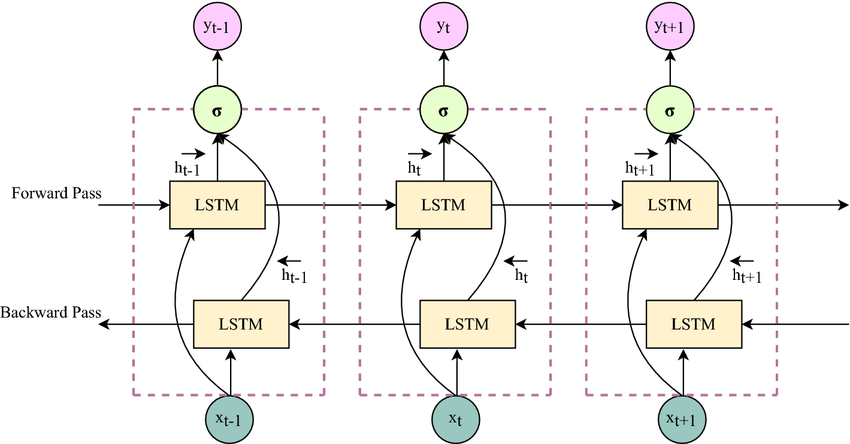


---

# **Bi-LSTM – Bidirectional Long Short-Term Memory**

## **1. What is Bi-LSTM?**

A Bidirectional LSTM (Bi-LSTM) is an extension of the standard LSTM that processes a sequence **in both forward and backward directions**.

It uses:

* one LSTM reading from **left → right**
* another LSTM reading from **right → left**

At each time step, outputs from both directions are combined.

This allows the network to learn **past and future context** for every position.

---

# **2. Why Bi-LSTM is Needed?**

Standard LSTM only uses **past** information (previous tokens).

But many tasks require **future** information too. For example:

* In the sentence:
  *"The bank will **loan** money"*
  the word “loan” helps interpret “bank”.

Bi-LSTM solves this by using **context from both sides**, improving accuracy in sequence tasks.

---

# **3. Bi-LSTM Architecture (Simple Explanation)**

### A Bi-LSTM has two LSTMs:

1. **Forward LSTM**
   Processes sequence from t = 1 → T
   Produces forward hidden states:
   ( h<sup>forward</sup><sub>1</sub>, h<sup>forward</sup><sub>2</sub>, …, h<sup>forward</sup><sub>T</sub> )

2. **Backward LSTM**
   Processes sequence from t = T → 1
   Produces backward hidden states:
   ( h<sup>backward</sup><sub>T</sub>, h<sup>backward</sup><sub>T-1</sub>, …, h<sup>backward</sup><sub>1</sub>)

### Combined Output at each time step:

* Concatenation
  ( h<sub>t</sub> = [ h<sup>forward</sup><sub>t</sub>, h<sup>backward</sup><sub>t</sub> ] )

or

* Sum
  ( h<sub>t</sub> = h<sup>forward</sup><sub>t</sub> + h<sup>backward</sup><sub>t</sub>  )

---

# **4. Types of Bi-LSTM (based on task)**

Same mapping types as LSTM but using a bidirectional layer:

---

## **A. Bi-LSTM Many-to-Many (aligned)**

Input & output have same length.

**Use cases:**

* POS Tagging
* NER
* Speech recognition
* Text tagging

---

## **B. Bi-LSTM Many-to-One**

Sequence input → single output.

**Use cases:**

* Sentiment analysis
* Document classification
* Emotion recognition

---

## **C. Bi-LSTM in Seq2Seq Encoder**

Encoder is often bidirectional.

**Use cases:**

* Machine translation
* Summarization
* Chatbots

---

## **D. Stacked Bi-LSTM**

Multiple layers stacked.

**Use cases:**

* Deeper NLP systems
* Speech-to-text
* Video tasks

---

# **5. Use Cases of Bi-LSTM**

### **Natural Language Processing**

* POS tagging
* Named Entity Recognition (NER)
* Chunking
* Relation extraction
* Text classification
* Sentence boundary detection

### **Speech Processing**

* Speech recognition
* Speaker identification
* Emotion detection

### **Time-Series**

* Activity recognition
* Human motion prediction
* Fault detection

### **Biomedical**

* ECG classification
* DNA sequence analysis

---

# **6. Advantages of Bi-LSTM**

### ✔ Uses both past and future context

Improves prediction accuracy significantly.

### ✔ Better for NLP

Language meaning often depends on BOTH previous and next words.

### ✔ Works well on tagging and label-per-token tasks

Like NER, POS, and speech labeling.

### ✔ Can be combined with attention

Even stronger performance.

### ✔ Handles long-term dependencies (inherits LSTM advantages)

---

# **7. Limitations of Bi-LSTM**

### ✘ Cannot be used for online/real-time prediction

Needs full sequence (cannot run backward without complete data).

### ✘ Double computation

Two LSTMs = nearly 2× parameters.

### ✘ Slower training

More memory and processing power required.

### ✘ Still sequential → cannot parallelize over time

Transformers solve this.

### ✘ Sometimes outperformed by Transformers in NLP

---

# **8. Summary**

* Bi-LSTM is an LSTM that reads data in **both forward and backward directions**.
* Output is formed by **combining forward and backward hidden states**.
* Useful for tasks where context from both sides matters.
* Types include many-to-many, many-to-one, seq2seq encoder, stacked Bi-LSTM.
* Advantages: better context understanding.
* Limitations: not suitable for real-time, heavier computation.

---


<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<title>Bi-LSTM Forward and Backward Propagation</title>
</head>
<body>

<h1>Bi-LSTM – Forward and Backward Propagation</h1>

<h2>1. What is Bi-LSTM?</h2>
<p>
A Bi-LSTM uses two LSTMs:
<br>
1. Forward LSTM (reads from left to right: t = 1 → T)
<br>
2. Backward LSTM (reads from right to left: t = T → 1)
<br><br>
At each time step t, the outputs of both directions are combined.
</p>

<hr>

<h2>2. Bi-LSTM Output</h2>
<p>
Final output at time t:
<br>
h<sub>t</sub> = [ h<sub>t</sub><sup>f</sup> ; h<sub>t</sub><sup>b</sup> ]
<br>(Concatenation of forward and backward hidden states)
</p>

<hr>

<h2>3. Forward LSTM (Left → Right)</h2>

<p>Let z<sub>t</sub><sup>f</sup> = [ h<sub>t-1</sub><sup>f</sup> ; x<sub>t</sub> ]</p>

<p>Forget gate:<br>
f<sub>t</sub><sup>f</sup> = sigmoid( W<sub>f</sub><sup>f</sup> * z<sub>t</sub><sup>f</sup> + b<sub>f</sub><sup>f</sup> )
</p>

<p>Input gate:<br>
i<sub>t</sub><sup>f</sup> = sigmoid( W<sub>i</sub><sup>f</sup> * z<sub>t</sub><sup>f</sup> + b<sub>i</sub><sup>f</sup> )
</p>

<p>Candidate memory:<br>
c~<sub>t</sub><sup>f</sup> = tanh( W<sub>c</sub><sup>f</sup> * z<sub>t</sub><sup>f</sup> + b<sub>c</sub><sup>f</sup> )
</p>

<p>Cell state update:<br>
c<sub>t</sub><sup>f</sup> = f<sub>t</sub><sup>f</sup> * c<sub>t-1</sub><sup>f</sup> + i<sub>t</sub><sup>f</sup> * c~<sub>t</sub><sup>f</sup>
</p>

<p>Output gate:<br>
o<sub>t</sub><sup>f</sup> = sigmoid( W<sub>o</sub><sup>f</sup> * z<sub>t</sub><sup>f</sup> + b<sub>o</sub><sup>f</sup> )
</p>

<p>Hidden output:<br>
h<sub>t</sub><sup>f</sup> = o<sub>t</sub><sup>f</sup> * tanh( c<sub>t</sub><sup>f</sup> )
</p>

<hr>

<h2>4. Backward LSTM (Right → Left)</h2>

<p>Let z<sub>t</sub><sup>b</sup> = [ h<sub>t+1</sub><sup>b</sup> ; x<sub>t</sub> ]</p>

<p>Forget gate:<br>
f<sub>t</sub><sup>b</sup> = sigmoid( W<sub>f</sub><sup>b</sup> * z<sub>t</sub><sup>b</sup> + b<sub>f</sub><sup>b</sup> )
</p>

<p>Input gate:<br>
i<sub>t</sub><sup>b</sup> = sigmoid( W<sub>i</sub><sup>b</sup> * z<sub>t</sub><sup>b</sup> + b<sub>i</sub><sup>b</sup> )
</p>

<p>Candidate memory:<br>
c~<sub>t</sub><sup>b</sup> = tanh( W<sub>c</sub><sup>b</sup> * z<sub>t</sub><sup>b</sup> + b<sub>c</sub><sup>b</sup> )
</p>

<p>Cell state update:<br>
c<sub>t</sub><sup>b</sup> = f<sub>t</sub><sup>b</sup> * c<sub>t+1</sub><sup>b</sup> + i<sub>t</sub><sup>b</sup> * c~<sub>t</sub><sup>b</sup>
</p>

<p>Output gate:<br>
o<sub>t</sub><sup>b</sup> = sigmoid( W<sub>o</sub><sup>b</sup> * z<sub>t</sub><sup>b</sup> + b<sub>o</sub><sup>b</sup> )
</p>

<p>Hidden output:<br>
h<sub>t</sub><sup>b</sup> = o<sub>t</sub><sup>b</sup> * tanh( c<sub>t</sub><sup>b</sup> )
</p>

<hr>

<h2>5. Combining Both Directions</h2>

<p>Final output at time t:</p>
<p>
h<sub>t</sub> = [ h<sub>t</sub><sup>f</sup> ; h<sub>t</sub><sup>b</sup> ]
</p>

<hr>

<h2>6. Backpropagation in Bi-LSTM (Simple Explanation)</h2>

<h3>Step 1: Gradient from the loss</h3>
<p>
The loss gives a gradient dL/dh<sub>t</sub> for the combined output.
</p>

<h3>Step 2: Split gradient into forward & backward parts</h3>

<p>If output is concatenation:</p>
<p>
dL/dh<sub>t</sub><sup>f</sup> = left half of dL/dh<sub>t</sub><br>
dL/dh<sub>t</sub><sup>b</sup> = right half of dL/dh<sub>t</sub>
</p>

<h3>Step 3: Backprop inside forward LSTM</h3>
<p>
Run normal LSTM backprop from t = T → 1 using dL/dh<sub>t</sub><sup>f</sup>.
</p>

<h3>Step 4: Backprop inside backward LSTM</h3>
<p>
Run normal LSTM backprop from t = 1 → T using dL/dh<sub>t</sub><sup>b</sup>.
</p>

<h3>Step 5: Compute parameter gradients</h3>
<p>
Each direction has its own parameters:
<br>
W<sup>f</sup> updated using forward gradients<br>
W<sup>b</sup> updated using backward gradients
</p>

<hr>

<h2>7. LSTM Cell Derivatives (Used for Both Directions)</h2>

<p>delta<sub>h,t</sub> = dL/dh<sub>t</sub></p>

<p>delta<sub>o,t</sub> = delta<sub>h,t</sub> * tanh(c<sub>t</sub>)</p>

<p>delta<sub>c,t</sub> = delta<sub>h,t</sub> * o<sub>t</sub> * (1 - tanh(c<sub>t</sub>)<sup>2</sup>) 
+ delta<sub>c,t+1</sub> * f<sub>t+1</sub></p>

<p>delta<sub>i,t</sub> = delta<sub>c,t</sub> * c~<sub>t</sub></p>

<p>delta<sub>f,t</sub> = delta<sub>c,t</sub> * c<sub>t-1</sub></p>

<p>delta<sub>c~,t</sub> = delta<sub>c,t</sub> * i<sub>t</sub></p>

<p>Activation derivatives:</p>
<p>
delta_a<sub>i,t</sub> = delta<sub>i,t</sub> * i<sub>t</sub> * (1 - i<sub>t</sub>)<br>
delta_a<sub>f,t</sub> = delta<sub>f,t</sub> * f<sub>t</sub> * (1 - f<sub>t</sub>)<br>
delta_a<sub>o,t</sub> = delta<sub>o,t</sub> * o<sub>t</sub> * (1 - o<sub>t</sub>)<br>
delta_a<sub>c,t</sub> = delta<sub>c~,t</sub> * (1 - (c~<sub>t</sub>)<sup>2</sup>)
</p>

</body>
</html>


---

# ✅ **Difference Between LSTM and Bi-LSTM**

| Feature                           | LSTM                                                 | Bi-LSTM                                                       |
| --------------------------------- | ---------------------------------------------------- | ------------------------------------------------------------- |
| **Full Form**                     | Long Short-Term Memory                               | Bidirectional Long Short-Term Memory                          |
| **Direction of Processing**       | Processes sequence **in one direction** (forward)    | Processes sequence in **two directions** (forward + backward) |
| **Context Used**                  | Uses **past context only**                           | Uses **past + future context**                                |
| **Architecture**                  | Single LSTM layer                                    | Two LSTM layers: Forward + Backward                           |
| **Hidden State Output**           | Only one hidden state: (h_t)                         | Two hidden states: (h_t^{fwd}), (h_t^{bwd}) combined          |
| **Accuracy**                      | Lower for tasks needing full context                 | Higher because it sees entire context                         |
| **Computational Cost**            | Lower (single LSTM)                                  | Higher (almost 2× parameters & computation)                   |
| **Memory Requirement**            | Less                                                 | More                                                          |
| **Use in Real-Time Applications** | Suitable (predicts step-by-step)                     | Not suitable (needs full sequence to run backward pass)       |
| **Best For**                      | Time-series prediction, forecasting, signal modeling | NLP tasks like NER, POS, sentiment, speech recognition        |
| **Output Shape**                  | Same as input direction                              | Usually concatenation: ([h^{fwd}, h^{bwd}])                   |
| **Training Speed**                | Faster                                               | Slower                                                        |
| **Parallelization**               | Limited (like all RNNs)                              | Even more limited (two passes)                                |

---

# **Summary**

### ✔ **LSTM**

Reads sequence in *one direction* → good for tasks needing only past information.

### ✔ **Bi-LSTM**

Reads sequence in *two directions* → uses past + future context → better for NLP and tagging tasks.

---

# **When to Use What?**

### Use **LSTM** when:

* Real-time prediction is required
* You only have past data (forecasting)
* Lightweight model needed

### Use **Bi-LSTM** when:

* Entire sequence is available
* Task needs context from both sides
* You want higher accuracy in NLP

---


Loaded: AirPassengers.csv
       Month  #Passengers
0 1949-01-01        112.0
1 1949-02-01        118.0
2 1949-03-01        132.0
3 1949-04-01        129.0
4 1949-05-01        121.0

Training LSTM...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 1024)           │     4,202,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,610,565 (48.11 MB)

 Trainable params: 4,203,521 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,407,044 (32.07 MB)

None
Training BiLSTM...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 2048)           │     8,404,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,221,125 (96.21 MB)

 Trainable params: 8,407,041 (32.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,814,084 (64.14 MB)

None


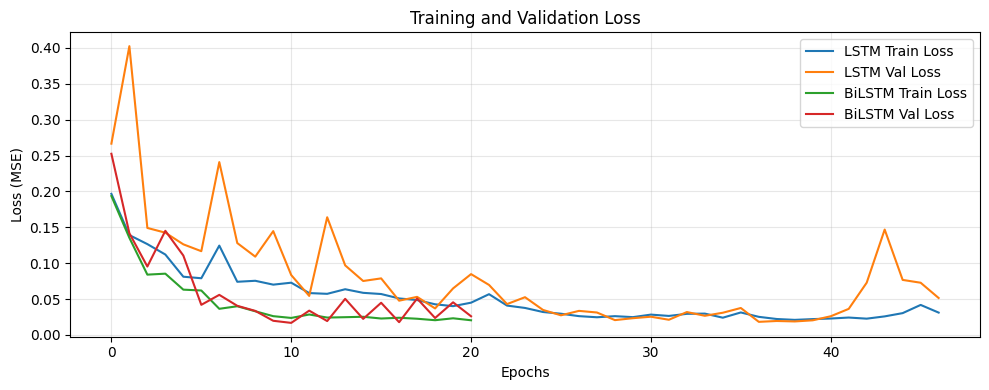


=== Test Metrics (Passengers) ===
LSTM   → MAE: 20.37 | RMSE: 24.39 | MSE: 594.85
BiLSTM → MAE: 21.97 | RMSE: 25.87 | MSE: 669.18

Head of Original vs Predicted (test):
        Month  Original_Passengers   LSTM_Pred  BiLSTM_Pred
0  1959-08-01           558.999756  529.414062   529.762024
1  1959-09-01           462.999969  454.774261   484.482880
2  1959-10-01           406.999817  380.696075   425.390594
3  1959-11-01           361.999664  371.607452   384.608032
4  1959-12-01           405.000244  376.116028   372.396027
5  1960-01-01           416.999939  412.594513   391.236084
6  1960-02-01           391.000061  438.019501   431.399139
7  1960-03-01           419.000031  422.100769   436.149323
8  1960-04-01           461.000000  431.930634   419.176605
9  1960-05-01           472.000061  495.714752   467.271088
10 1960-06-01           534.999756  567.873474   565.956482
11 1960-07-01           621.999878  613.729980   626.338806


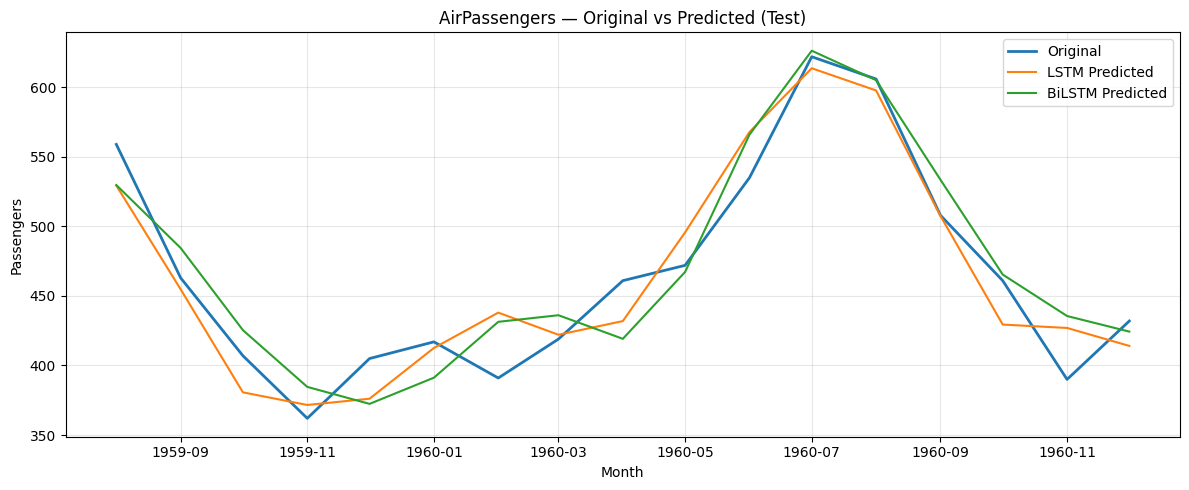

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
# -----------------------------
# 1) Load data (local CSV)
# -----------------------------
CSV_PATHS = ["AirPassengers.csv","AirPassengers.csv", "airline-passengers.csv"]  # try in this order
TARGET = "#Passengers"
DATE_COL = "Month"

df = None
for p in CSV_PATHS:
    try:
        df = pd.read_csv(p)
        print(f"Loaded: {p}")
        break
    except Exception:
        pass

if df is None:
    raise FileNotFoundError(
        "Could not find CSV. Place 'AirPassengers.csv' or 'airline-passengers.csv' in the working directory.\n"
        "Expected columns: Month, Passengers"
    )

# normalize columns
df.columns = [c.strip() for c in df.columns]

# Basic checks / coercions
if DATE_COL not in df.columns:
    # try fallback common variants
    for c in df.columns:
        if c.lower() in ["month", "date", "time"]:
            DATE_COL = c
            break

if TARGET not in df.columns:
    # try fallback common variants
    for c in df.columns:
        if c.lower() in ["passengers", "passenger", "value"]:
            TARGET = c
            break

# Parse datetime and sort
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")
df = df.dropna(subset=[DATE_COL, TARGET]).sort_values(DATE_COL).reset_index(drop=True)

# Keep only date + target
df_small = df[[DATE_COL, TARGET]].copy()
df_small[TARGET] = df_small[TARGET].astype("float32")

print(df_small.head())

# -----------------------------
# 2) Scale & window (12 months)
# -----------------------------
values = df_small[[TARGET]].values
#scaler = StandardScaler(with_std=True)
#scaler = RobustScaler()
scaler = PowerTransformer(method='yeo-johnson')
#scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

def make_windows(series, window=12):
    X, y = [], []
    for i in range(window, len(series)):
        X.append(series[i-window:i, 0])
        y.append(series[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X.reshape((X.shape[0], X.shape[1], 1)), y

WINDOW = 12*3  # one year of monthly lags
EPOCHS = 1000
X, y = make_windows(scaled, window=WINDOW)
time_index = df_small[DATE_COL].iloc[WINDOW:].reset_index(drop=True)

# Chronological split: 70/15/15 (small dataset)
n = len(X)
n_train = int(n * 0.7)
n_val   = int(n * 0.15)
n_test  = n - n_train - n_val

X_train = X[:n_train]
y_train = y[:n_train]
X_val   = X[n_train:n_train+n_val]
y_val   = y[n_train:n_train+n_val]
X_test  = X[n_train+n_val:]
y_test  = y[n_train+n_val:]

time_test = time_index[n_train+n_val:].reset_index(drop=True)

# -----------------------------
# 3) Models
# -----------------------------
# Hypermarams: activation, recurrent_activation, use_bias, kernel_initializer, recurrent_initializer, bias_initializer, unit_forget_bias, kernel_regularizer, recurrent_regularizer, bias_regularizer, activity_regularizer, kernel_constraint, recurrent_constraint, bias_constraint, dropout, recurrent_dropout, seed, return_sequences, return_state, go_backwards, , unroll, use_cudnn
def build_lstm(window,
               units=1024,
               activation="tanh",
               recurrent_activation="hard_sigmoid",
               use_bias=True,
               kernel_initializer="glorot_uniform",
               recurrent_initializer="orthogonal",
               bias_initializer="zeros",
               unit_forget_bias=True,
               dropout=0.0,
               recurrent_dropout=0.0,
               optimizer=keras.optimizers.AdamW(learning_rate=0.001),
               loss="mse"):
    """
    LSTM with configurable hyperparameters. Keep return_sequences=False to match scalar target.
    """
    m = Sequential([
        Input(shape=(window, 1)),
        LSTM(
            units,
            activation=activation,
            recurrent_activation=recurrent_activation,
            use_bias=use_bias,
            kernel_initializer=kernel_initializer,
            recurrent_initializer=recurrent_initializer,
            bias_initializer=bias_initializer,
            unit_forget_bias=unit_forget_bias,
            dropout=dropout,
            recurrent_dropout=recurrent_dropout,
            return_sequences=False
        ),
        Dense(1)
    ])
    m.compile(optimizer=optimizer, loss=loss)
    return m

def build_bilstm(window,
                 units=1024,
                 activation="tanh",
                 recurrent_activation="hard_sigmoid",
                 use_bias=True,
                 kernel_initializer="glorot_uniform",
                 recurrent_initializer="orthogonal",
                 bias_initializer="zeros",
                 unit_forget_bias=True,
                 dropout=0.0,
                 recurrent_dropout=0.0,
                 optimizer=keras.optimizers.AdamW(learning_rate=0.001),
                 loss="mse"):
    """
    Bidirectional LSTM with the same hyperparameter set. return_sequences=False -> single vector output.
    """
    m = Sequential([
        Input(shape=(window, 1)),
        Bidirectional(
            LSTM(
                units,
                activation=activation,
                recurrent_activation=recurrent_activation,
                use_bias=use_bias,
                kernel_initializer=kernel_initializer,
                recurrent_initializer=recurrent_initializer,
                bias_initializer=bias_initializer,
                unit_forget_bias=unit_forget_bias,
                dropout=dropout,
                recurrent_dropout=recurrent_dropout,
                return_sequences=False
            )
        ),
        Dense(1)
    ])
    m.compile(optimizer=optimizer, loss=loss)
    return m
   
lstm = build_lstm(WINDOW)
bilstm = build_bilstm(WINDOW)

early = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

print("\nTraining LSTM...")
history_lstm = lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS, batch_size=8, verbose=0,
    callbacks=[early]
)
print(lstm.summary())
print("Training BiLSTM...")
history_bilstm = bilstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS, batch_size=8, verbose=0,
    callbacks=[early]
)
print(bilstm.summary())
#   plot history of training/validation loss
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.plot(history_bilstm.history['loss'], label='BiLSTM Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
# -----------------------------
# 4) Predict & invert scaling
# -----------------------------
pred_lstm   = lstm.predict(X_test, verbose=0)
pred_bilstm = bilstm.predict(X_test, verbose=0)

orig_test   = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
pred_lstm   = scaler.inverse_transform(pred_lstm).flatten()
pred_bilstm = scaler.inverse_transform(pred_bilstm).flatten()

# -----------------------------
# 5) Metrics
# -----------------------------
def mae(a, b): return float(np.mean(np.abs(a - b)))
def rmse(a, b): return float(np.sqrt(np.mean((a - b)**2)))
def mse(a, b): return float(np.mean((a - b)**2))

print("\n=== Test Metrics (Passengers) ===")
print(f"LSTM   → MAE: {mae(orig_test, pred_lstm):.2f} | RMSE: {rmse(orig_test, pred_lstm):.2f} | MSE: {mse(orig_test, pred_lstm):.2f}")
print(f"BiLSTM → MAE: {mae(orig_test, pred_bilstm):.2f} | RMSE: {rmse(orig_test, pred_bilstm):.2f} | MSE: {mse(orig_test, pred_bilstm):.2f}")

# -----------------------------
# 6) Original vs Predicted DataFrame (test)
# -----------------------------
result_df = pd.DataFrame({
    "Month": time_test,
    "Original_Passengers": orig_test,
    "LSTM_Pred": pred_lstm,
    "BiLSTM_Pred": pred_bilstm
})
print("\nHead of Original vs Predicted (test):")
print(result_df.head(12))

# -----------------------------
# 7) Plots
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(result_df["Month"], result_df["Original_Passengers"], label="Original", linewidth=2)
plt.plot(result_df["Month"], result_df["LSTM_Pred"], label="LSTM Predicted")
plt.plot(result_df["Month"], result_df["BiLSTM_Pred"], label="BiLSTM Predicted")
plt.title("AirPassengers — Original vs Predicted (Test)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: zoom into last N test points
N = 24
if len(result_df) > N:
    plt.figure(figsize=(12, 5))
    plt.plot(result_df["Month"].iloc[-N:], result_df["Original_Passengers"].iloc[-N:], label="Original", linewidth=2)
    plt.plot(result_df["Month"].iloc[-N:], result_df["LSTM_Pred"].iloc[-N:], label="LSTM Predicted")
    plt.plot(result_df["Month"].iloc[-N:], result_df["BiLSTM_Pred"].iloc[-N:], label="BiLSTM Predicted")
    plt.title(f"Zoom: Last {N} Months — Original vs Predicted")
    plt.xlabel("Month")
    plt.ylabel("Passengers")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
